In [ ]:
### This notebook combines all positive,negative and target sgRNAs and add primers to it

In [1]:
import pandas as pd 
from os import listdir
from os.path import join
import sys
sys.path.append('../src')
from utils import *
import matplotlib.pyplot as plt 

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
out_path = '../../data/output/sg_Finder'
mrna_path = '../../data/MANE'
fpath = '../../data/sg_out/'

# Load all expressed transcripts
ess_genelist = pd.read_csv('../../data/output/K562_comm_ess.txt', header =None)
neutral_genelist = pd.read_csv('../../data/output/K562_neutral.txt', header =None)

# fpath = '../../data/output/sg_out/'
list_gene = [i for i in listdir(fpath) if not i.startswith('.')]
list_gene = [i for i in list_gene if len(listdir(join(fpath,i))) > 5]
list_gene_ess = [i for i in list_gene if i in list(ess_genelist[0])]
list_gene_neutral = [i for i in list_gene if i in list(neutral_genelist[0])]

In [6]:
# How many genes not have any sgRNA detected from CHOPCHOP
# for gene_folder in join(out_path,gene,)
# 6 genes are first filtered out
inter_gene =list(set(ess_genelist[0]).intersection(set(list_gene_ess)))
left_out_genes = [ i for i in list(set(ess_genelist[0]))  if i not in list_gene_ess]

In [6]:
print(f'{len(left_out_genes)} genes didnt have any sgRNA\
generated by CHOPCHOP:{left_out_genes}')
### Usually because the isoforms varies too much that CHOPCHOP can't find a union. Tested SARS1 on website version.

6 genes didnt have any sgRNAgenerated by CHOPCHOP:['GINS1', 'FARSB', 'RPS9', 'SARS1', 'LRR1', 'POLD3']


In [8]:
### Filtered genes. They are the same across 11nt window and 13nt window
df_filter = pd.read_csv(join(out_path, 'ess_15','filter_gene.csv'), index_col =0)
df_filter = df_filter.set_index('gene')

***Get synonymous and stop codon sgRNA for ess and neutral genes***

In [14]:
stop_abe_ess,mis_abe_ess, syn_abe_ess = sg_consequence('ess_15', list_gene_ess, 'ess','df_abe_detail.csv')
stop_cbe_ess,mis_cbe_ess, syn_cbe_ess = sg_consequence('ess_15', list_gene_ess, 'ess','df_cbe_detail.csv')

In [16]:
stop_abe_neutral, mis_abe_neutral, syn_abe_neutral = sg_consequence('neutral_15', list_gene_neutral, 'neutral','df_abe_detail.csv')
stop_cbe_neutral, mis_cbe_neutral, syn_cbe_neutral = sg_consequence('neutral_15', list_gene_neutral, 'neutral',\
                                                                    'df_cbe_detail.csv')

In [18]:
print(f'There are in total {len(syn_abe_ess)} synonymous ABE and {len(syn_cbe_ess)} CBE sgRNA in essential genes')
print(f'There are in total {len(syn_abe_neutral)} synonymous ABE and {len(syn_cbe_neutral)} \
CBE sgRNA in neutral genes')

There are in total 2134 synonymous ABE and 3528 CBE sgRNA in essential genes
There are in total 237 synonymous ABE and 311 CBE sgRNA in neutral genes


In [18]:
print(f'There are in total {len(stop_abe_ess)} stop codon ABE and {len(stop_cbe_ess)} CBE sgRNA in essential genes')
print(f'There are in total {len(stop_abe_neutral)} stop codon ABE and {len(stop_cbe_neutral)} CBE sgRNA in neutral genes')

There are in total 0 stop codon ABE and 377 CBE sgRNA in essential genes
There are in total 0 stop codon ABE and 35 CBE sgRNA in neutral genes


In [19]:
print(f'There are in total {len(mis_abe_ess)} missense codon ABE and {len(mis_cbe_ess)} CBE sgRNA in essential genes')
print(f'There are in total {len(mis_abe_neutral)} missense codon ABE \
and {len(mis_cbe_neutral)} CBE sgRNA in neutral genes')

There are in total 17873 missense codon ABE and 8506 CBE sgRNA in essential genes
There are in total 1756 missense codon ABE and 834 CBE sgRNA in neutral genes


***Sets of controls***
1. Positive controls: 
    1. iStop(entire set, separate) for CBE, iSilence for ABE(100, NGN)
    2. stop sgRNA in essential genes(200)
    3. missense sgRNA in essential genes(200)
2. Negative controls: 
    1. stop sgRNA& synonymous sgRNA&missense sgRNA in neutral genes(100+100+100)
    2. empty window sgRNA in essential genes(200)
    3. Nontarget sgRNA and safe-harbor sgRNA(120, seperate)
    )

***Positive controls***

In [21]:
isilence = pd.read_csv('../../data/control_sg/iSilence.csv', index_col = 0)
# Filter only NGN PAM sgRNA & genes that in our list
isilence_NGN = isilence[isilence['PAM'].apply(lambda x: x[1] == 'G')]
isilence_NGN['Source'] = isilence_NGN['Source'].str.split('_', expand = True)[1]
# isilence_gene = list(isilence_NGN['Gene'].unique())
# ess_isilence_df = isilence_NGN[isilence_NGN['Gene'].isin(set(isilence_gene).intersection(set(list_gene_ess)))]

/storage/group/epo2/default/yur97/conda_envs/synSg/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
abe_isilence_df = isilence_NGN[isilence_NGN['Source']=='ABE']
dual_isilence_df = isilence_NGN[isilence_NGN['Source']=='Dual']

In [23]:
print(f'There are {len(abe_isilence_df)} ABE isilence control ')
print(f'There are {len(dual_isilence_df)} ABE&CBE isilence control, will be add seperate primers')

There are 560 ABE isilence control 
There are 674 ABE&CBE isilence control, will be add seperate primers


In [24]:
# There are no overlap between isilence and stop sg in our libaray
set(list(dual_isilence_df['sgRNA'])).intersection(set(list(stop_cbe_ess.index)))

set()

In [27]:
### ABE positive control
abe_PCT = list(set(list(abe_isilenceb_df['sgRNA'])+list(stop_abe_ess.index)))
print(f'{len(abe_PCT)} isilence and stop sgRNAs')

560 isilence and stop sgRNAs


In [28]:
### CBE positive control
sel_stop_cbe_ess = sel_CT(stop_cbe_ess.reset_index(),200)
cbe_PCT = list(set(sel_stop_cbe_ess['sgRNA']))
print(f'{len(cbe_PCT)} stop sgRNAs, istop and dual isilence will have different primers')

181 stop sgRNAs, istop and dual isilence will have different primers


***Negative controls***

In [29]:
### 100 stop sg and 100 synsg in neutral genes
# sel_stop_abe_neutral = sel_CT(stop_abe_neutral.reset_index(),100)
# sel_stop_cbe_neutral = sel_CT(stop_cbe_neutral.reset_index(),100)
sel_syn_abe_neutral = sel_CT(syn_abe_neutral.reset_index(),100)
sel_syn_cbe_neutral = sel_CT(syn_cbe_neutral.reset_index(),100)
sel_mis_abe_neutral = sel_CT(mis_abe_neutral.reset_index(),100)
sel_mis_cbe_neutral = sel_CT(mis_cbe_neutral.reset_index(),100)

In [30]:
### empty window sgRNA in essential genes
ABE_etywind = org_sgdf(join(out_path,'ess_15','ABE_CT.csv'))
CBE_etywind = org_sgdf(join(out_path,'ess_15','CBE_CT.csv'))
# Select empty window sg for at least one sg per gene
sel_ABE_etywind = sel_CT(ABE_etywind,250)
sel_CBE_etywind = sel_CT(CBE_etywind,250)

In [31]:
### ABE negative control
abe_NCT = list(set(sel_syn_abe_neutral['sgRNA']))+list(set(sel_mis_abe_neutral['sgRNA']))+\
list(set(stop_abe_neutral.index))+list(set(sel_ABE_etywind['sgRNA']))
print(f'{len(abe_NCT)} neutral sgRNA and empty window sgRNA')

437 neutral sgRNA and empty window sgRNA


In [32]:
### CBE negative control
cbe_NCT = list(set(sel_syn_cbe_neutral['sgRNA']))+list(set(sel_mis_cbe_neutral['sgRNA']))+\
list(set(stop_cbe_neutral.index))+list(set(sel_CBE_etywind['sgRNA']))
print(f'{len(cbe_NCT)} neutral sgRNA and empty window sgRNA')

460 neutral sgRNA and empty window sgRNA


In [33]:
final_abe = list(set(syn_abe_ess.index)) + abe_PCT+abe_NCT
print(f'There are in total {len(syn_abe_ess)} synonymous ABE')
print(f'{len(final_abe)} Final ABE library with controls')

There are in total 2134 synonymous ABE
3131 Final ABE library with controls


In [34]:
final_cbe = list(set(syn_cbe_ess.index)) + cbe_PCT+cbe_NCT
print(f'There are in total {len(syn_cbe_ess)} synonymous CBE')
print(f'{len(final_cbe)} Final CBE library with controls')

There are in total 3528 synonymous CBE
4169 Final CBE library with controls


In [35]:
final_dual = list(set(dual_isilence_df['sgRNA']))
print(f'There are in total {len(final_dual)} dual isilence sgRNA')

There are in total 673 dual isilence sgRNA


## ***Add primers***

In [36]:
rABE_noprimer_list,rABE_pass_list = get_noprimer_list(final_abe)
rCBE_noprimer_list,rCBE_pass_list = get_noprimer_list(final_cbe)
rDUAL_noprimer_list,rDUAL_pass_list = get_noprimer_list(final_dual)
print(f'{len(rABE_noprimer_list)} ABE sg groups and {len(rCBE_noprimer_list)} CBE sg groups')

1541 ABE sg groups and 2071 CBE sg groups


In [37]:
write_noprime_list('rREsg_ABE.fasta',final_abe)
write_noprime_list('rREsg_CBE.fasta',final_cbe)
write_noprime_list('rREsg_Dual.fasta',final_dual)

***Blastn all primers***

In [ ]:
# cd /data/output/primers
# makeblastdb -in rREsg_ABE.fasta -dbtype nucl -parse_seqids -max_file_sz 4000000000
# blastn -query PossiblePrimers.fasta -db rREsg_ABE.fasta -out Blast_Primer_ABE.txt -word_size 7 -dust no
#or
# blastn -query PossiblePrimers.fasta -db rREsg_ABE.fasta -out Blast_Primer_ABE.txt -word_size 7 -dust no -outfmt "6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore staxids"

# makeblastdb -in rREsg_CBE.fasta -dbtype nucl -parse_seqids -max_file_sz 4000000000
# blastn -query PossiblePrimers.fasta -db rREsg_CBE.fasta -out Blast_Primer_CBE.txt -word_size 7 -dust no

#or
# blastn -query PossiblePrimers.fasta -db rREsg_CBE.fasta -out Blast_Primer_CBE.txt -word_size 7 -dust no -outfmt "6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore staxids"


# makeblastdb -in rREsg_Dual.fasta -dbtype nucl -parse_seqids -max_file_sz 4000000000
# blastn -query PossiblePrimers.fasta -db rREsg_Dual.fasta -out Blast_Primer_Dual.txt -word_size 7 -dust no -outfmt "6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore staxids"

In [38]:
BlastQueryPrimer_ABE = read_blast_res('Blast_Primer_ABE.txt')
BlastQueryPrimer_CBE = read_blast_res('Blast_Primer_CBE.txt')
BlastQueryPrimer_Dual = read_blast_res('Blast_Primer_Dual.txt')

In [41]:
PrimerHeteroTM_ABE = calc_TM(BlastQueryPrimer_ABE[0:200],rABE_noprimer_list)

100%|████████████████████████████████████████████████████| 200/200 [48:55<00:00, 14.68s/it]


In [42]:
PrimerHeteroTM_CBE = calc_TM(BlastQueryPrimer_CBE[0:200],rCBE_noprimer_list)
PrimerHeteroTM_Dual = calc_TM(BlastQueryPrimer_Dual[0:200],rDUAL_noprimer_list)

100%|████████████████████████████████████████████████████| 200/200 [03:59<00:00,  1.20s/it]


In [48]:
GoodPrimer_ABE = sel_primers(21,PrimerHeteroTM_ABE)
GoodPrimer_CBE = sel_primers(21,PrimerHeteroTM_CBE)
GoodPrimer_Dual = sel_primers(21,PrimerHeteroTM_Dual)

In [58]:
list_primers = []

In [98]:
F = 'GGGATCACTTACTACTTCCG'
R = 'GGTACCCTATCACTTAACCG'
list_primers.append(F)
list_primers.append(R)

Fwd,Rev,oligoTM, primerTM = calc_best_primerTM(F,R, rABE_noprimer_list)
ABE_final_seq = attach_group_primer(rABE_pass_list,Fwd[:18],Rev[:18])
df_abe_final = pd.DataFrame({'sequence':ABE_final_seq})
df_abe_final['sequence'] = df_abe_final['sequence'].apply(lambda x:''.join(x))
df_abe_final = df_abe_final.reset_index()
df_abe_final['name'] = 'ABE_'+df_abe_final['index'].astype(str)

In [99]:
F = 'CACTAGAGTAATCGCTACCG'
R = 'GGGCTACTAGACATAACTCG'
list_primers.append(F)
list_primers.append(R)
Fwd,Rev,oligoTM, primerTM = calc_best_primerTM(F,R, rCBE_noprimer_list)
CBE_final_seq = attach_group_primer(rCBE_pass_list,Fwd[:18],Rev[:18])
df_cbe_final = pd.DataFrame({'sequence':CBE_final_seq})
df_cbe_final['sequence'] = df_cbe_final['sequence'].apply(lambda x:''.join(x))
df_cbe_final = df_cbe_final.reset_index()
df_cbe_final['name'] = 'CBE_'+df_cbe_final['index'].astype(str)

In [100]:
F ='CCCTCTAGTCTTTCCAATCG'
R ='GCCTGATATCACTCCTATCG'
list_primers.append(F)
list_primers.append(R)
Fwd,Rev,oligoTM, primerTM = calc_best_primerTM(F,R,rDUAL_noprimer_list)
Dual_final_seq = attach_group_primer(rDUAL_pass_list,Fwd[:18],Rev[:18])
df_dual_final = pd.DataFrame({'sequence':Dual_final_seq})
df_dual_final['sequence'] = df_dual_final['sequence'].apply(lambda x:''.join(x))
df_dual_final = df_dual_final.reset_index()
df_dual_final['name'] = 'Dual_'+df_dual_final['index'].astype(str)

In [101]:
df = pd.concat([df_abe_final,df_cbe_final,df_dual_final], axis = 0)

In [103]:
df[['name','sequence']].to_csv('../../data/output/sg_order.csv',index = False)

In [64]:
from itertools import combinations
for (i,j) in combinations(list_primers,2):
    print(p3.calcHeterodimer(i,j))

ThermoResult(structure_found=True, tm=-27.88, dg=-3438.94, dh=-29400.00, ds=-83.70)
ThermoResult(structure_found=True, tm=-35.37, dg=-1780.86, dh=-31000.00, ds=-94.21)
ThermoResult(structure_found=True, tm=-70.10, dg=-1826.52, dh=-17800.00, ds=-51.50)
ThermoResult(structure_found=True, tm=-35.37, dg=-1780.86, dh=-31000.00, ds=-94.21)
ThermoResult(structure_found=True, tm=-70.10, dg=-1826.52, dh=-17800.00, ds=-51.50)
ThermoResult(structure_found=True, tm=-48.37, dg=-2442.50, dh=-23100.00, ds=-66.60)
ThermoResult(structure_found=True, tm=-47.21, dg=-2233.67, dh=-24100.00, ds=-70.50)
ThermoResult(structure_found=True, tm=-70.10, dg=-1826.52, dh=-17800.00, ds=-51.50)
ThermoResult(structure_found=True, tm=-36.22, dg=-2717.51, dh=-27500.00, ds=-79.90)
ThermoResult(structure_found=True, tm=-70.10, dg=-1826.52, dh=-17800.00, ds=-51.50)
ThermoResult(structure_found=True, tm=-36.22, dg=-2717.51, dh=-27500.00, ds=-79.90)
ThermoResult(structure_found=True, tm=-80.40, dg=-1287.23, dh=-16300.00, ds=

In [11]:
# Get number of control sgRNA per gene 
# A bigger window will cause less sgRNA become control sg, then more RNA might go to the synonysmou/non-synonymous pool
name_11 = 'ess_11';name_13 = 'ess_13';name_15 = 'ess_15'

ABE_synsg11,CBE_synsg11,df_abeCT11,df_cbeCT11 = read_summ_files(name_11)
ABE_synsg13,CBE_synsg13,df_abeCT13,df_cbeCT13 = read_summ_files(name_13)
ABE_synsg15,CBE_synsg15,df_abeCT15,df_cbeCT15 = read_summ_files(name_15)

tot_abe_CT11,tot_cbe_CT11 = get_control_sg(df_abeCT11,df_cbeCT11,'11')
tot_abe_CT13,tot_cbe_CT13= get_control_sg(df_abeCT13,df_cbeCT13,'13')
tot_abe_CT15,tot_cbe_CT15= get_control_sg(df_abeCT15,df_cbeCT15,'15')

# Get the filtered sgRNA
df_abe11,df_cbe11 = get_pass_dict(name_11, list_gene, '11')
df_abe13,df_cbe13 = get_pass_dict(name_13,list_gene, '13')
df_abe15,df_cbe15 = get_pass_dict(name_15,list_gene, '15')

In [18]:
df_abe_anlyz = make_analyze_df([df_abe11,tot_abe_CT11,df_abe13,tot_abe_CT13,df_abe15,tot_abe_CT15])
df_cbe_anlyz = make_analyze_df([df_cbe11,tot_cbe_CT11,df_cbe13,tot_cbe_CT13,df_cbe15,tot_cbe_CT15])

***sgRNAs that map to the edge of exons (position 0, 1,2) are filtered to avoid cut in intron splice site***

In [45]:
df_filter_genes = pd.concat([df_filter11,df_abe_anlyz.sum_11], axis = 1).fillna(0)
df_filter_genes = df_filter_genes[df_filter_genes['sum_11']>0]
df_filter_genes['Filtered/All'] = df_filter_genes.n_filtered/df_filter_genes.sum_11
### 108/122 genes remaining, the rest of genes don't have MANE sequence the same with CHOPCHOP sequence

<AxesSubplot:title={'center':'near junction/all sgRNA per gene'}, ylabel='Frequency'>

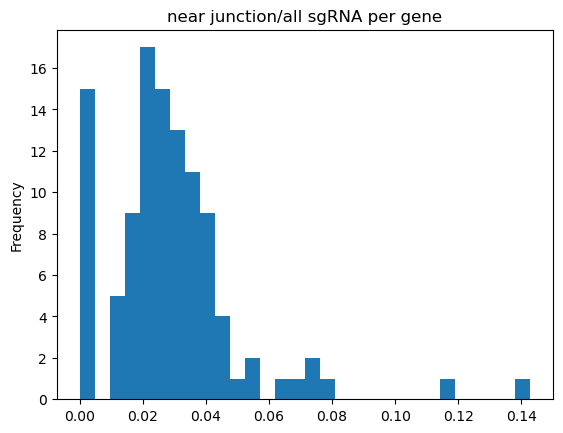

In [53]:
df_filter_genes['Filtered/All'].plot(kind = 'hist',bins = 30, title = 'near junction/all sgRNA per gene')

Most genes have 1%~5% sgRNA locate near the exon/intron junction. These are filtered out.